# Example Flux Calibration of Spectra

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import kaepora as kpora
import flux_calibration as fc
import composite

## Query the database, normalize spectra, and correct for host reddening

In [5]:
query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where Spectra.SN = '2004ef' and Flux_Cal_Scale"
spec_array_test = kpora.grab(query_test, multi_epoch = True, make_corr = True, verbose=True)
spec_array_test = composite.prelim_norm(spec_array_test)
spec_array_test = kpora.host_dereddening(spec_array_test, verbose=False, cutoff=2.)

Using: ../data/kaepora_v1.db
25 Total Spectra found
1 flagged spectra removed 24 spectra left
0 spectra of peculiar Ias removed 24 spectra left
24 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
2004ef sn2004ef-20040910.310-ui-corrected.flm bsnip 50.7512194353 -5.1019170987 53258.31 53263.57 0.030985 12.0 3264.0 10134.0
2004ef sn2004ef-20040924.302-ui-corrected.flm bsnip 16.6619407908 8.46957036233 53272.302 53263.57 0.030985 12.0 3274.0 10134.0
2004ef sn2004ef-20041018-br-corrected.flm bsnip 50.9171754968 31.645465259 53296.196 53263.57 0.030985 12.0 3030.0 9066.0
2004ef sn2004ef-20041114-br.flm bsnip 7.67355545718 57.6439036455 53323.0 53263.57 0.030985 12.0 3196.0 9066.0
2004ef sn2004ef-20040907.30-fast.flm cfa 13.5484176256 -8.02145521031 53255.3 53263.57 0.030985 12.0 3428.0 7140.0
2004ef sn2004ef-20040908.35-fast.flm cfa 12.9240376014 -7.003011683 53256.35 53263.57 0.030985 12.0 3396.0

## Example light curve interpolation and show spectral epochs

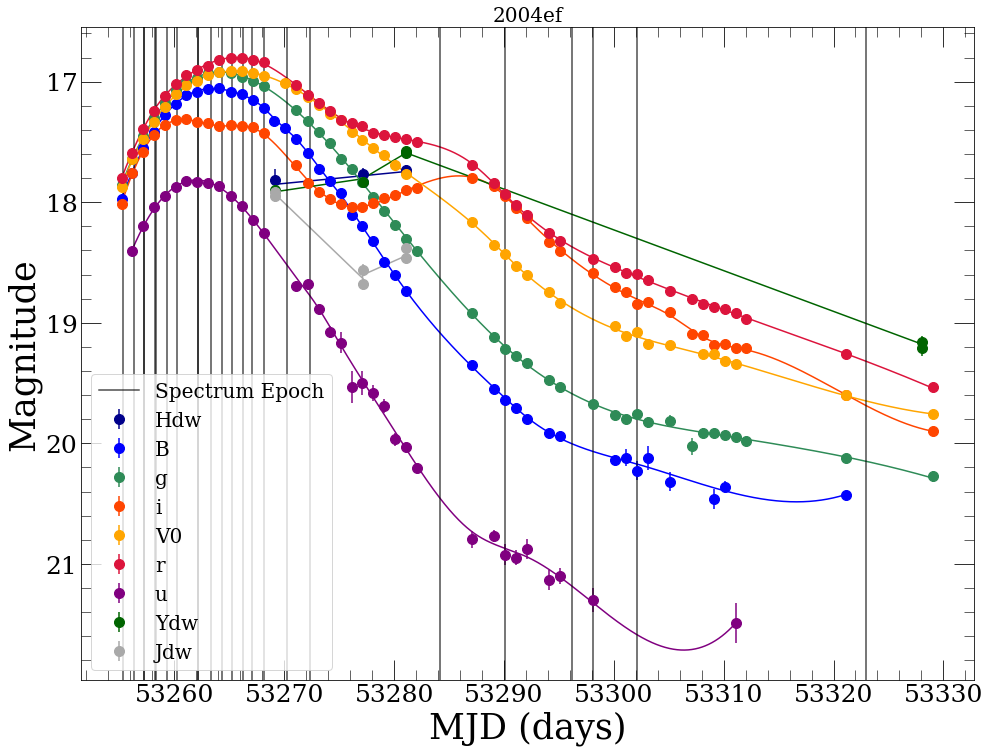

In [6]:
phot = spec_array_test[0].homog_light_curves
mjds = []
for spec in spec_array_test:
    mjds.append(spec.mjd)
fc.plot_light_curves(phot, spec.name, spec_dates = mjds, fit=True)

## Flux calibrate the spectra using the constant value stored in the database

In [7]:
for spec in spec_array_test:
    spec.flux *= spec.other_spectral_data['Flux_Cal_Scale']
    spec.ivar /= spec.other_spectral_data['Flux_Cal_Scale']**2.

## Plot calibrated spectra

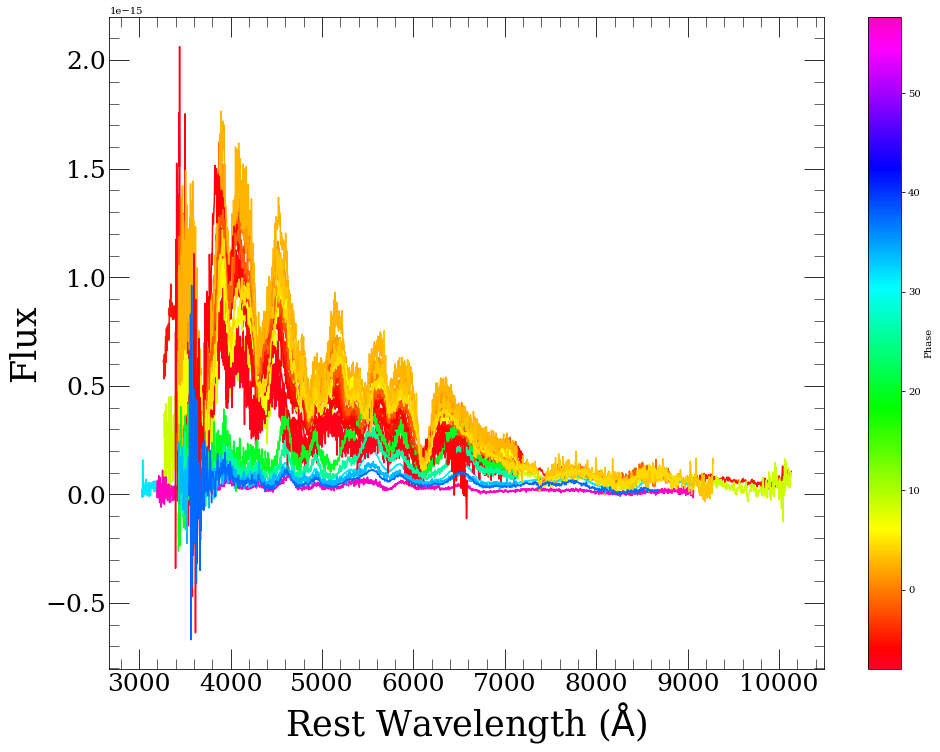

In [8]:
fc.plot_spectra(spec_array_test)